In [34]:
pip install torch torchvision transformers

In [35]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image,ImageDraw,ImageFont
import matplotlib.pyplot as plt

device=torch.device('cude' if torch.cuda.is_available() else 'cpu')
blip_processor=BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model=BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

In [36]:
def generate_caption_with_image(image_path):

    image = Image.open(image_path).convert("RGB")

    inputs = blip_processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        output_ids = blip_model.generate(**inputs)
    caption = blip_processor.decode(output_ids[0], skip_special_tokens=True)

    return image,caption

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated caption: a lake surrounded by trees and a forest


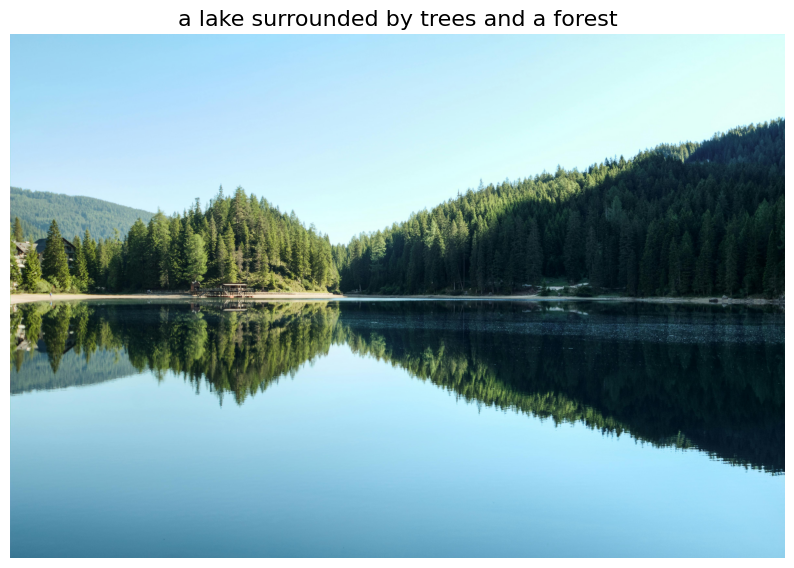

In [38]:
image_path=r"/content/imagetest.jpg"
image,caption=generate_caption_with_image(image_path)
print("Generated caption:",caption)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.title(caption,fontsize=16, wrap=True)
plt.show()